In [58]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh


def plt_show(image) :
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

face_mesh =  mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)


cap = cv2.VideoCapture(0)
for i in range(10) :
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        break;
        continue
cap.release()

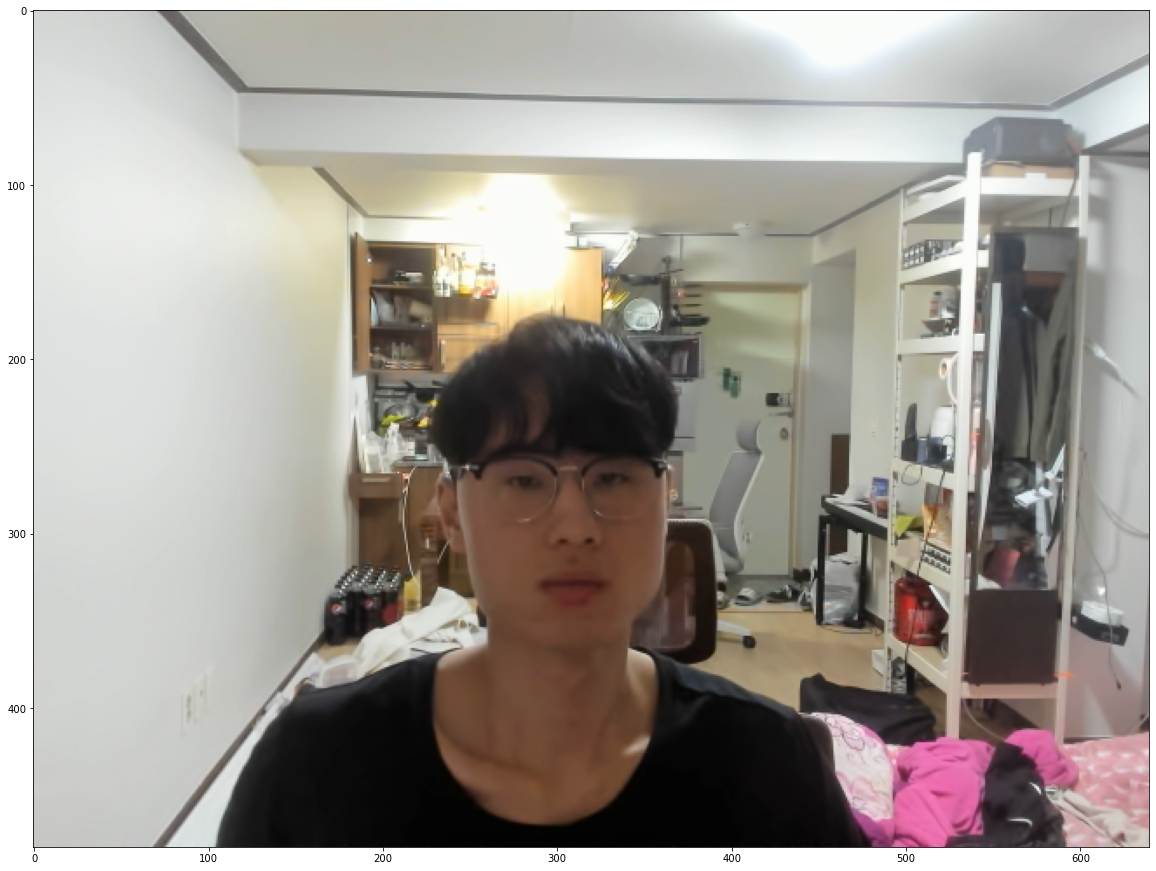

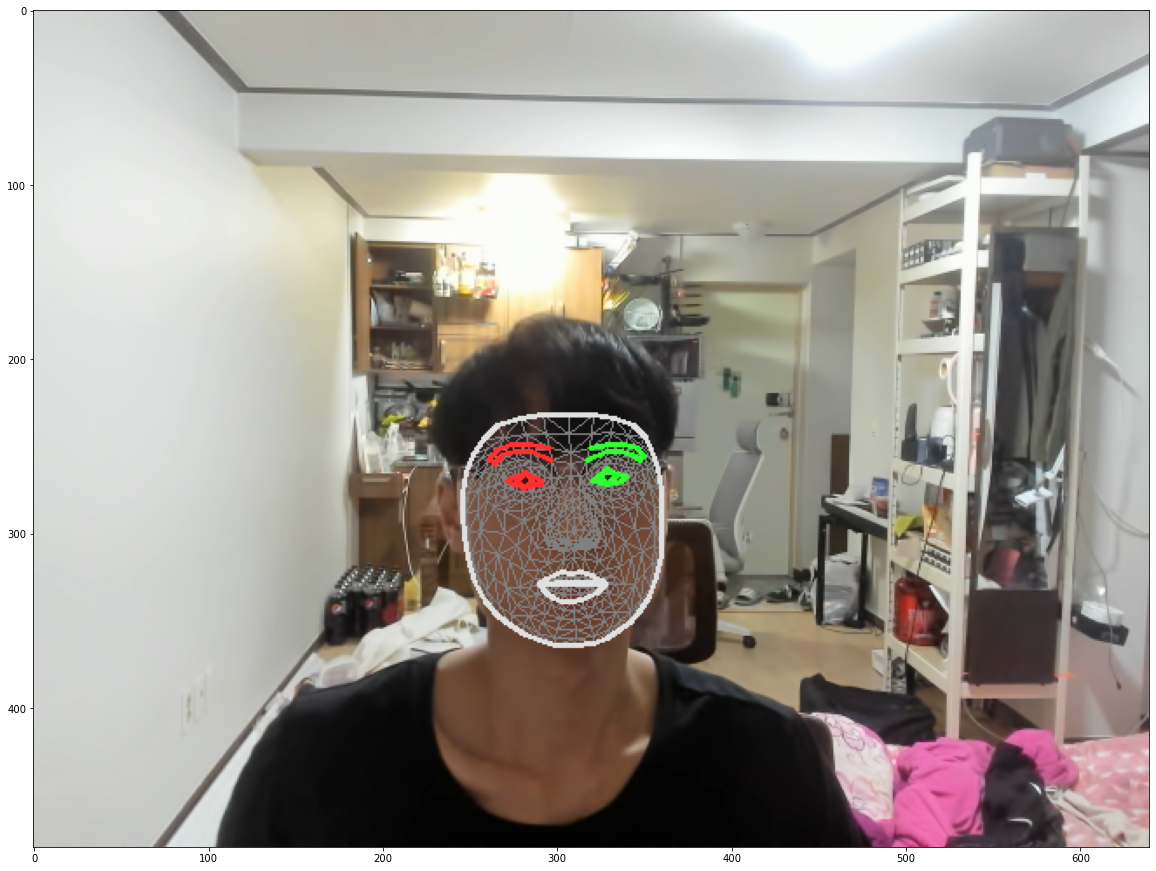

: 

In [59]:
image.flags.writeable = False
results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image.flags.writeable = True

vis_image = image.copy()        
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=vis_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style()
        )
        mp_drawing.draw_landmarks(
            image=vis_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style()
        )
        mp_drawing.draw_landmarks(
            image=vis_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style()
        )

plt_show(image)
plt_show(vis_image)

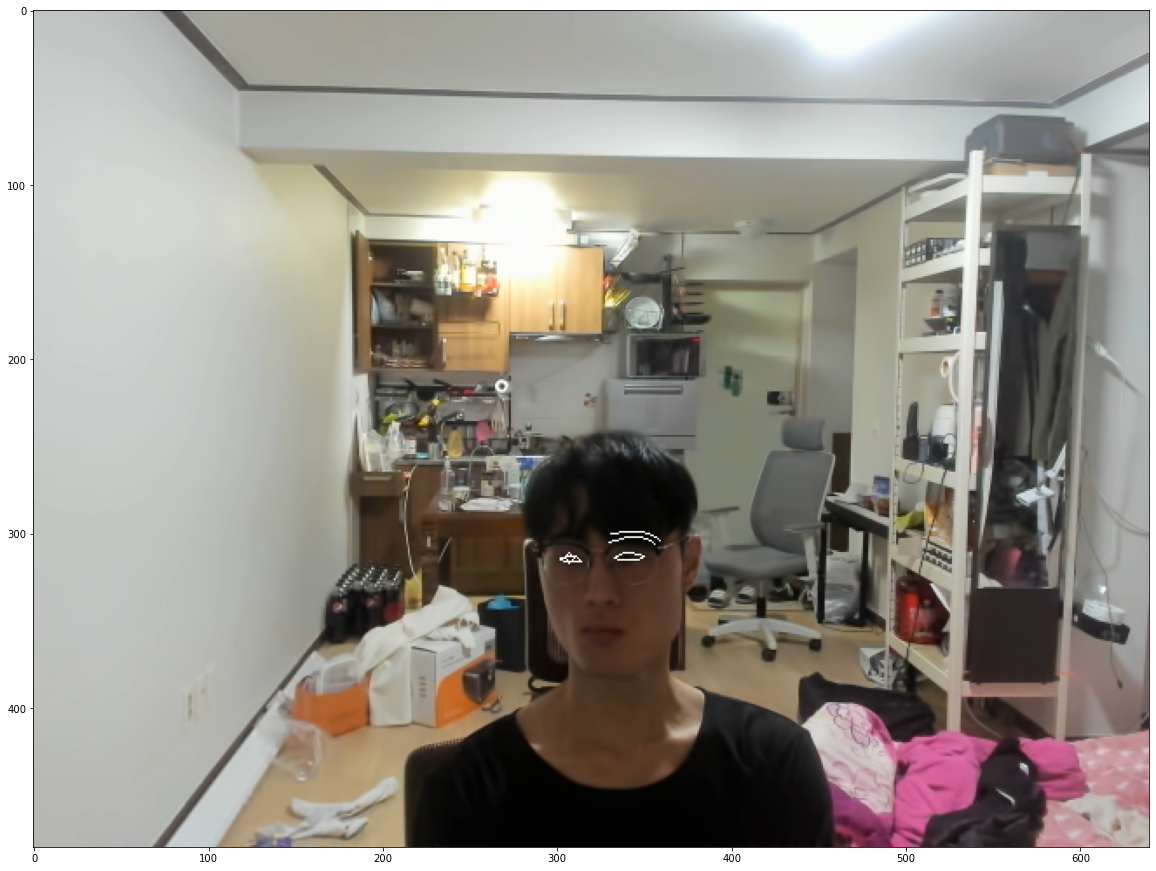

In [56]:
LEFT_EYE = [
    362, 
]


face_landmarks = results.multi_face_landmarks[0]
face_landmarks_array = np.array(
    list(map(
        lambda kpt : [kpt.x, kpt.y, kpt.z],
        face_landmarks.landmark
    ))
)

vis_image_2 = image.copy()
vis_image_2 = cv2.polylines(
    vis_image_2,
    (
        face_landmarks_array[
            np.array(list(mp_face_mesh.FACEMESH_LEFT_EYE)),
            :2
        ] * np.array([image.shape[1], image.shape[0]])
    ).astype(int),
    isClosed=False,
    color=(255,255,255)
)

vis_image_2 = cv2.polylines(
    vis_image_2,
    (
        face_landmarks_array[
            np.array(list(mp_face_mesh.FACEMESH_RIGHT_EYE)),
            :2
        ] * np.array([image.shape[1], image.shape[0]])
    ).astype(int),
    isClosed=False,
    color=(255,255,255)
)

vis_image_2 = cv2.polylines(
    vis_image_2,
    (
        face_landmarks_array[
            np.array(list(mp_face_mesh.FACEMESH_LEFT_EYEBROW)),
            :2
        ] * np.array([image.shape[1], image.shape[0]])
    ).astype(int),
    isClosed=False,
    color=(255,255,255)
)

vis_image_2 = cv2.polylines(
    vis_image_2,
    (
        face_landmarks_array[
            np.array(list(mp_face_mesh.FACEMESH_RIGHT_IRIS)),
            :2
        ] * np.array([image.shape[1], image.shape[0]])
    ).astype(int),
    isClosed=False,
    color=(255,255,255)
)

plt_show(vis_image_2)